In [9]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'D:\datascience\projects\Python-Projects\taxi_analysis\datasets\data_orders.csv')
df.head(5)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [36]:
df['hour'] = df['order_datetime'].apply(lambda time: datetime.strptime(time, "%H:%M:%S").hour )
df.head(10)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,hour
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,18
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,20
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,12
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0,13
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN,21
5,21:21:23,-0.947011,51.456380,NaN,3000583117054,9,0,NaN,21
6,07:58:15,-0.955637,51.470372,NaN,3000582791789,9,0,NaN,7
7,07:53:46,-0.978230,51.454575,NaN,3000582791562,9,0,NaN,7
8,08:53:01,-1.052298,51.454308,NaN,3000582817606,9,0,NaN,8
9,06:33:52,-0.976216,51.433202,NaN,3000582765616,4,0,78.0,6


In [72]:
grouped_after = df.groupby('is_driver_assigned_key')
cancelled_after_assigned = grouped_after.get_group(1)
group_time_DA = cancelled_after_assigned.groupby('hour')['hour'].count().reset_index(name='rides')


grouped_before = df.groupby('is_driver_assigned_key')
cancelled_before_assigned = grouped_before.get_group(0)
group_time_DNA = cancelled_before_assigned.groupby('hour')['hour'].count().reset_index(name='rides')


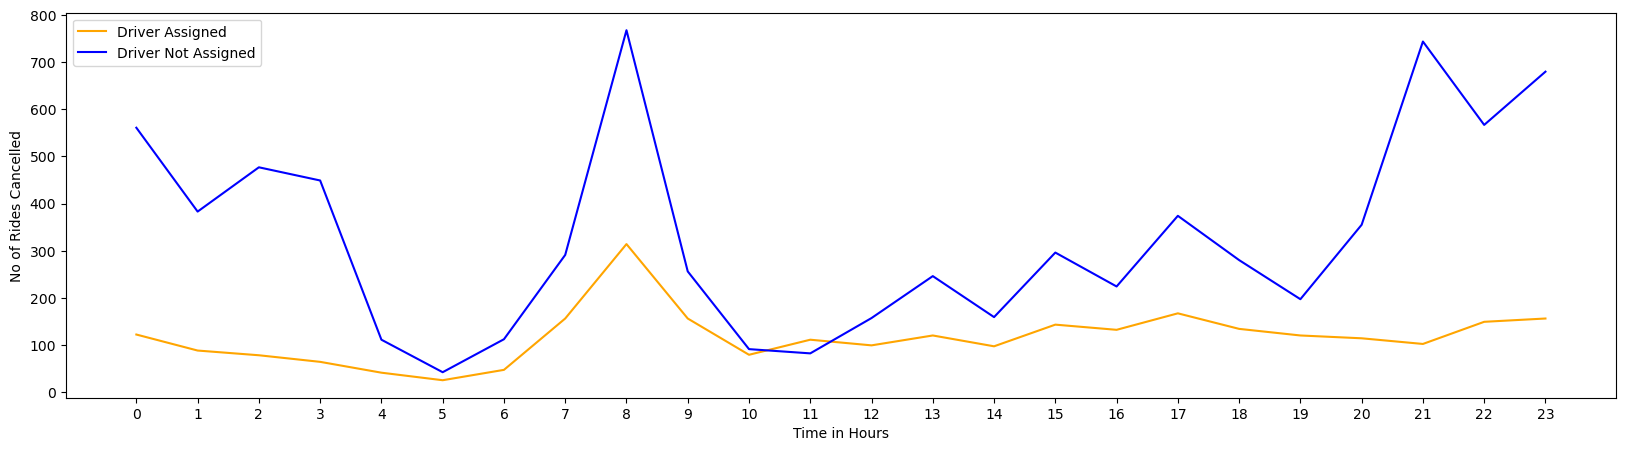

In [75]:

plt.figure(figsize=(20,5))
plt.plot(group_time_DA['hour'], group_time_DA['rides'], color = 'orange', label = 'Driver Assigned')
plt.plot(group_time_DNA['hour'], group_time_DNA['rides'], color = 'blue', label = 'Driver Not Assigned')
plt.xticks(group_time_DA['hour'])
plt.xlabel('Time in Hours')
plt.ylabel('No of Rides Cancelled')
plt.legend()
plt.show()